In [ ]:
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/cleaned_merged_seasons_team_aggregated.csv"
df = pd.read_csv(url)
df.shape
display(df.head())

/tmp/ipython-input-2997175808.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,transfers_in,transfers_out,value,was_home,yellow_cards,GW,points,team_goals_scored,team_goals_conceded,team_goals_diff
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,0,0,55,False,0,1,NaN,NaN,NaN,NaN
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,0,0,60,True,0,1,NaN,NaN,NaN,NaN
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,0,0,80,True,0,1,NaN,NaN,NaN,NaN
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,0,0,50,False,0,1,NaN,NaN,NaN,NaN
4,2016-17,Abdul Rahman Baba,DEF,NaN,0,0,0,0,0.0,80,...,0,0,55,True,0,1,NaN,NaN,NaN,NaN


In [ ]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126076 entries, 0 to 126075
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   season_x             126076 non-null  object 
 1   name                 126076 non-null  object 
 2   position             126076 non-null  object 
 3   team_x               106042 non-null  object 
 4   assists              126076 non-null  int64  
 5   bonus                126076 non-null  int64  
 6   bps                  126076 non-null  int64  
 7   clean_sheets         126076 non-null  int64  
 8   creativity           126076 non-null  float64
 9   element              126076 non-null  int64  
 10  fixture              126076 non-null  int64  
 11  goals_conceded       126076 non-null  int64  
 12  goals_scored         126076 non-null  int64  
 13  ict_index            126076 non-null  float64
 14  influence            126076 non-null  float64
 15  kickoff_time     

,0
season_x,0
name,0
position,0
team_x,20034
assists,0
bonus,0
bps,0
clean_sheets,0
creativity,0
element,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Numeric column distributions (Histograms)
This shows how numeric values (like scores, averages, etc.) are spread out.

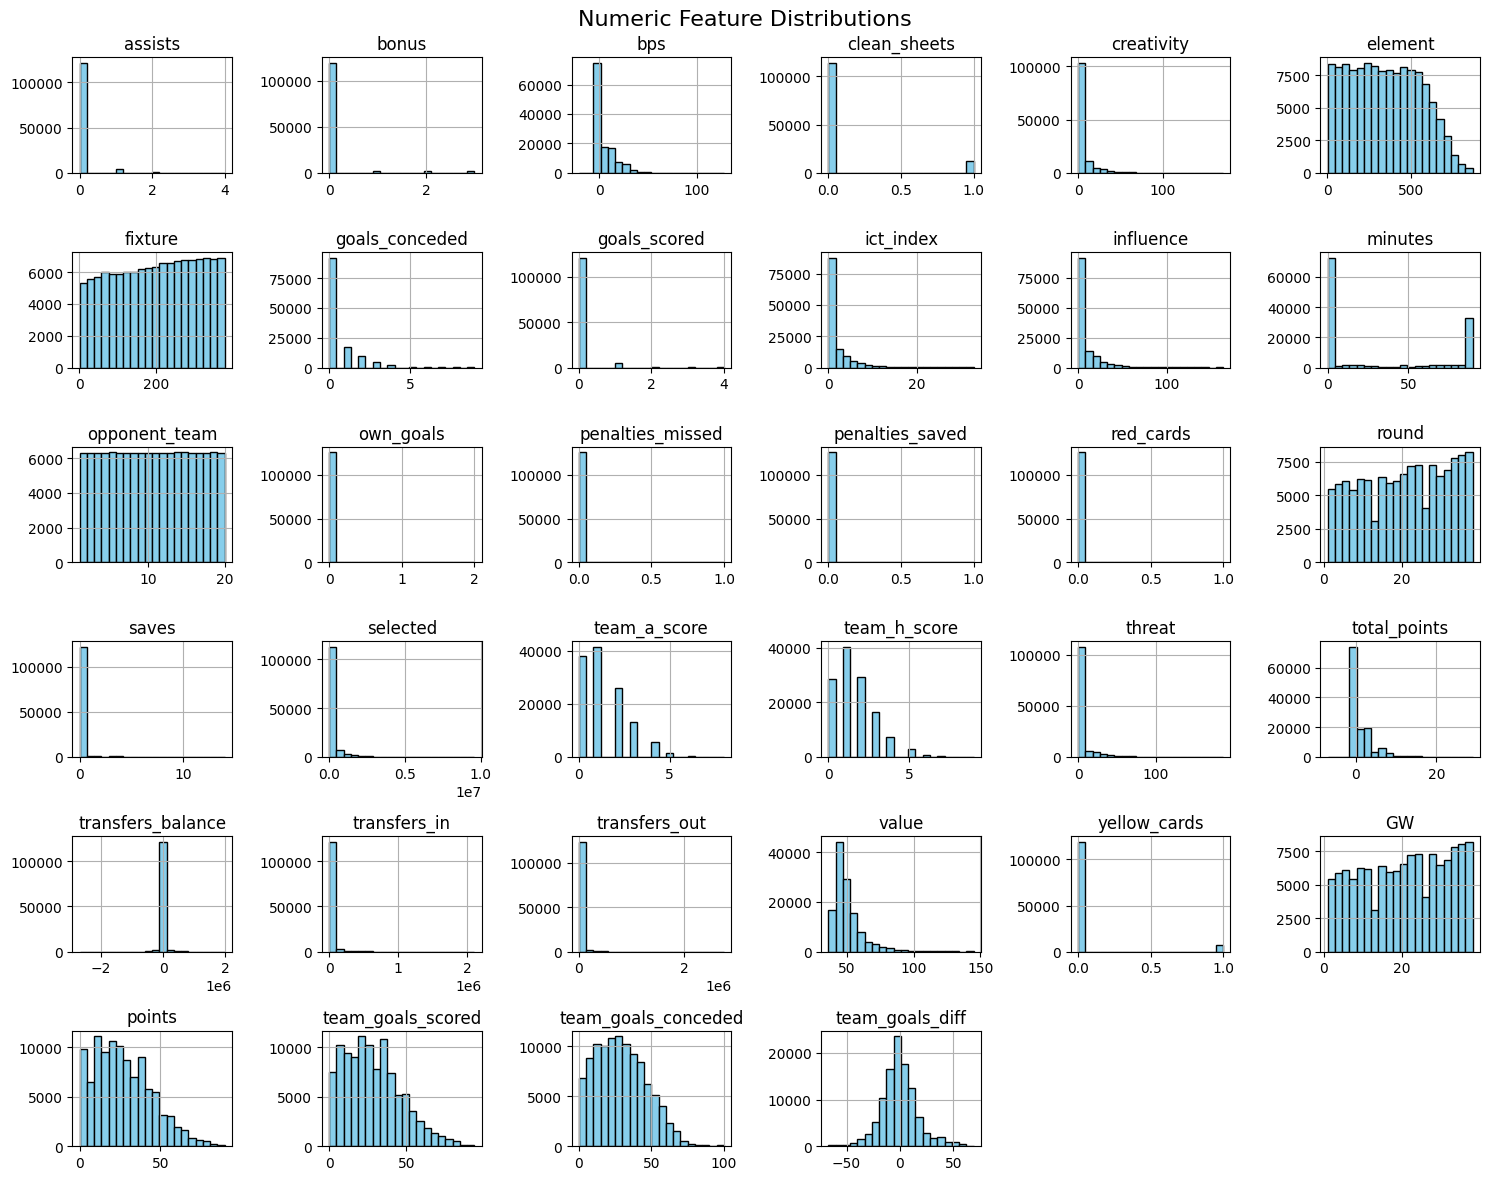

In [ ]:
df.select_dtypes(include='number').hist(figsize=(15,12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Numeric Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

Graph by Player Names

In [ ]:
import pandas as pd
import plotly.express as px

player_name = input("Enter player name exactly as in the dataset: ").strip()

player_data = df[df['name'].str.lower() == player_name.lower()]

if player_data.empty:
    print("No data found for this player. Check spelling or spacing.")
else:
    seasons = sorted(player_data['season_x'].dropna().unique())
    print(f"\nAvailable seasons for {player_name}: {', '.join(seasons)}")

    chosen_season = input("Enter season to view (e.g., '2022-23'): ").strip()

    if chosen_season not in seasons:
        print(f" Season '{chosen_season}' not found for this player.")
    else:
        season_data = player_data[player_data['season_x'] == chosen_season]
        season_data = season_data.sort_values(by='GW')

        fig = px.line(
            season_data,
            x='GW',
            y='total_points',
            title=f"{player_name} - Points Over Gameweeks ({chosen_season})",
            markers=True,
            hover_data=['opponent_team', 'team_x', 'round', 'minutes', 'value']
        )

        fig.update_traces(line=dict(width=3), marker=dict(size=8))
        fig.update_layout(
            template='plotly_dark',
            title_x=0.5,
            xaxis_title='Gameweek',
            yaxis_title='Total Fantasy Points'
        )
        fig.show(renderer="colab")

Enter player name exactly as in the dataset: Cole Palmer

Available seasons for Cole Palmer: 2020-21, 2021-22, 2022-23, 2023-24
Enter season to view (e.g., '2022-23'): 2023-24


Boxplots (Outlier detection)
Boxplots highlight medians and outliers for each numeric variable.

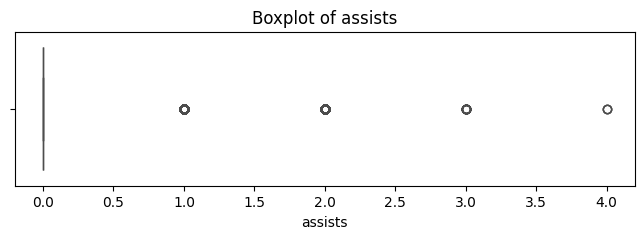

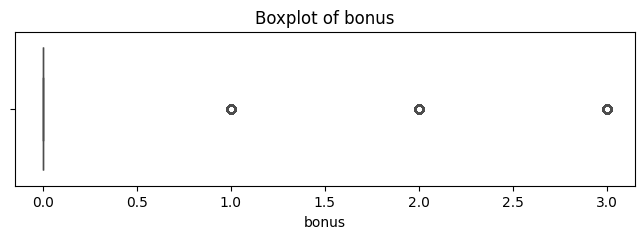

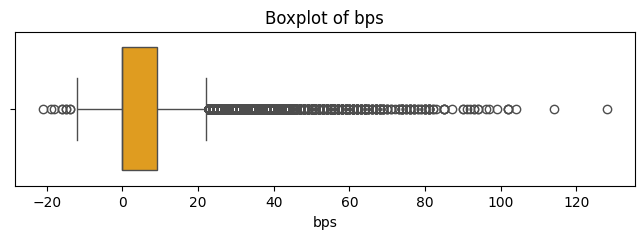

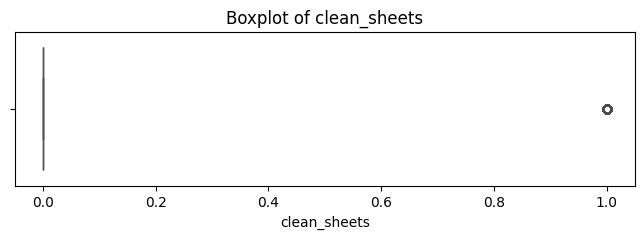

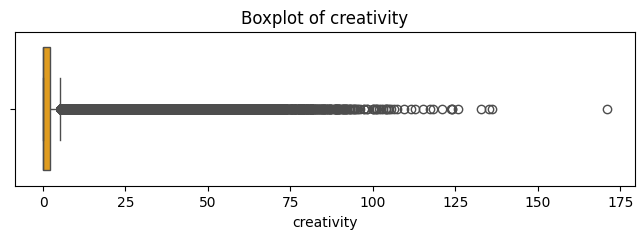

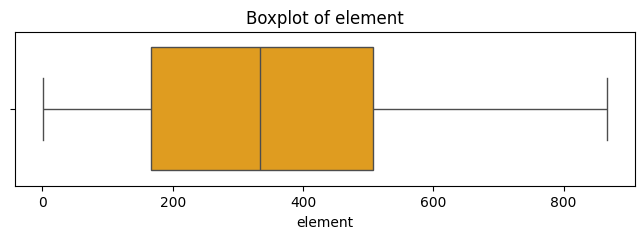

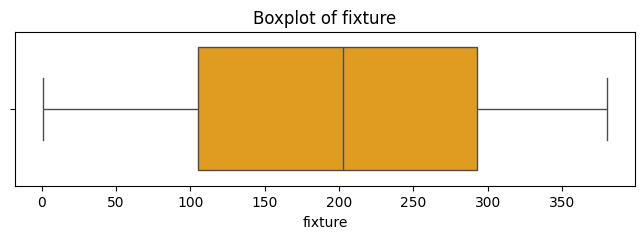

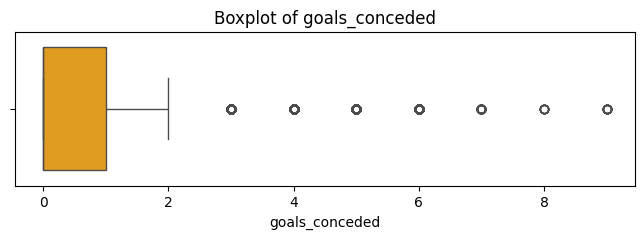

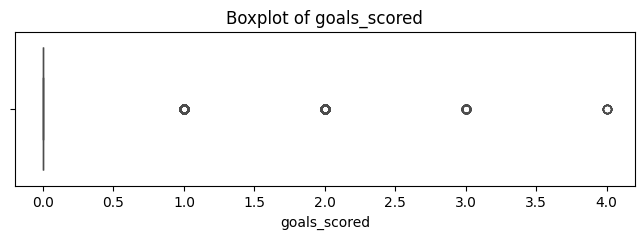

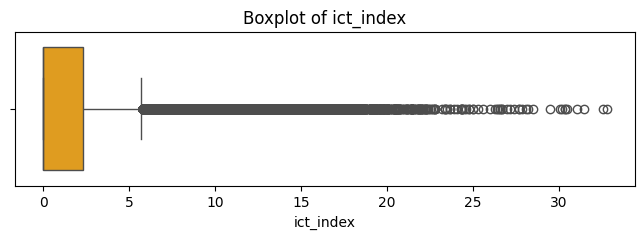

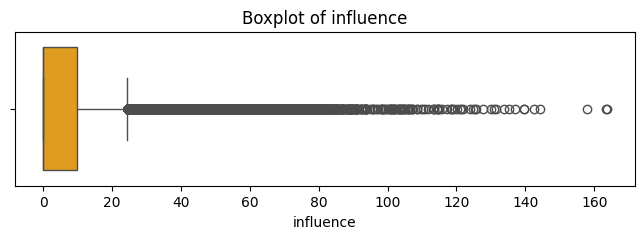

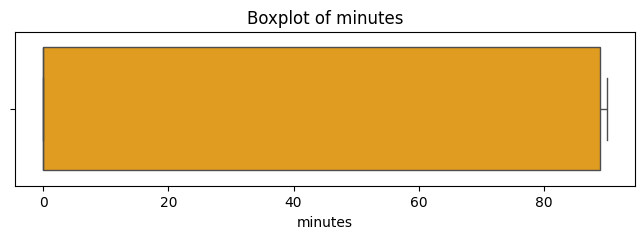

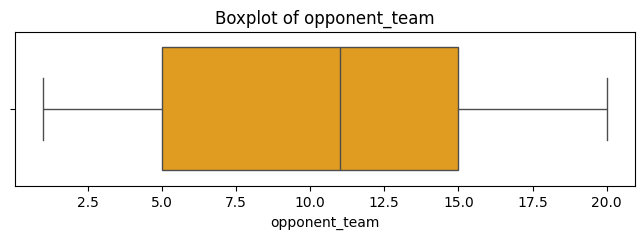

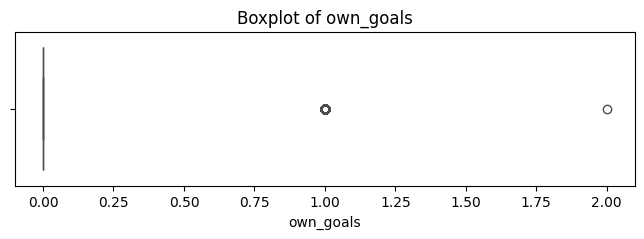

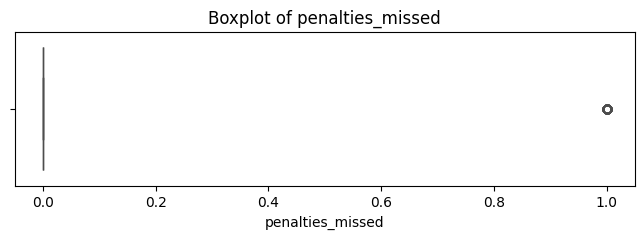

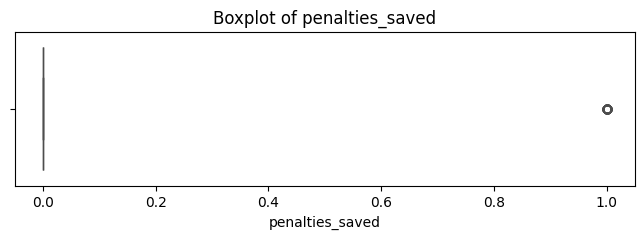

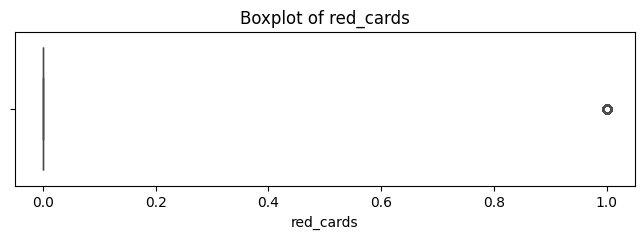

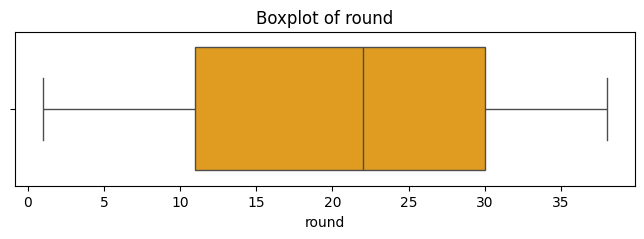

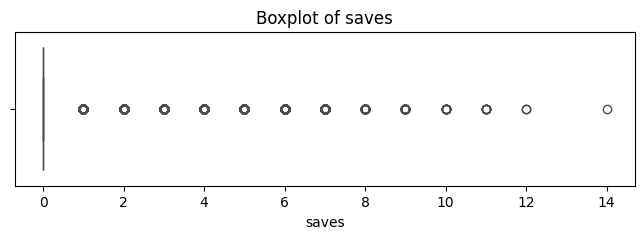

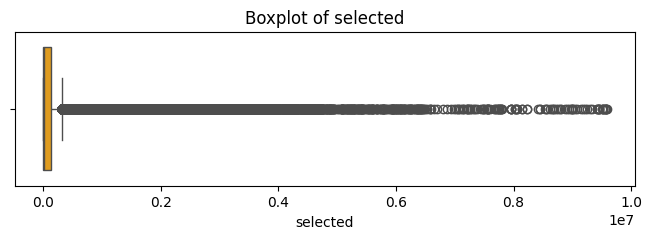

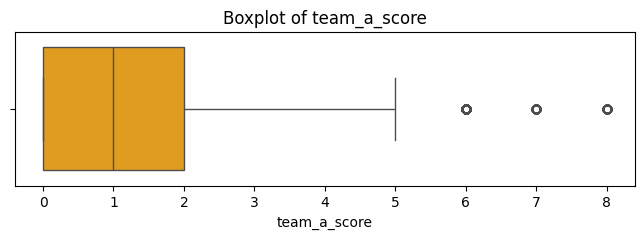

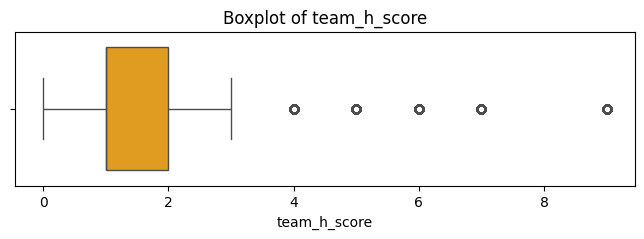

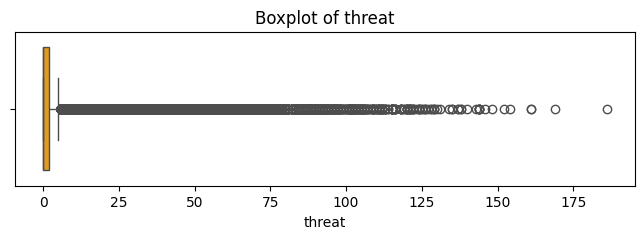

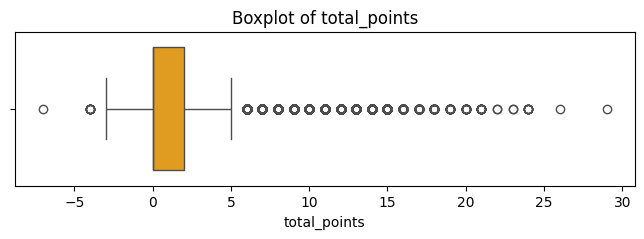

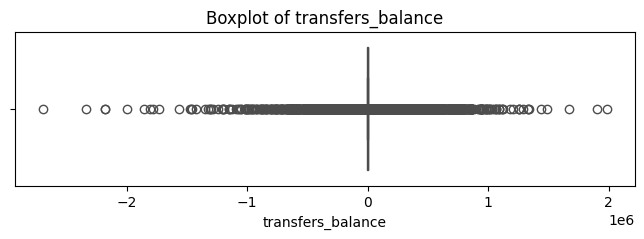

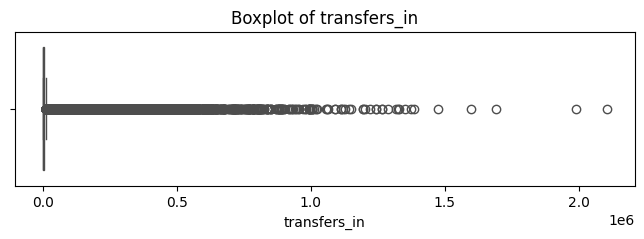

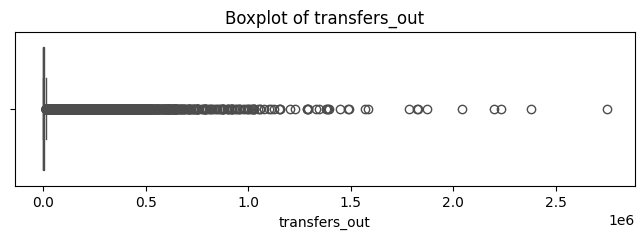

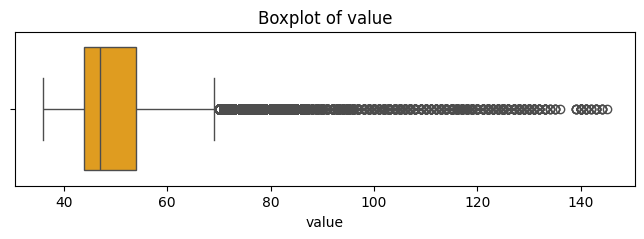

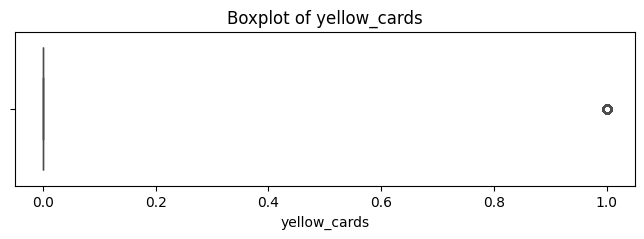

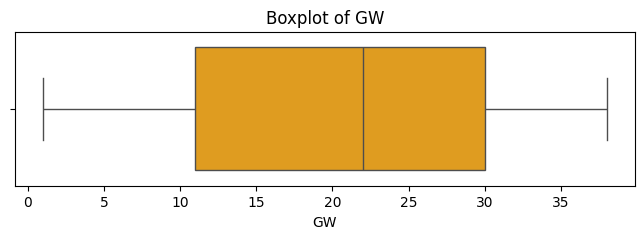

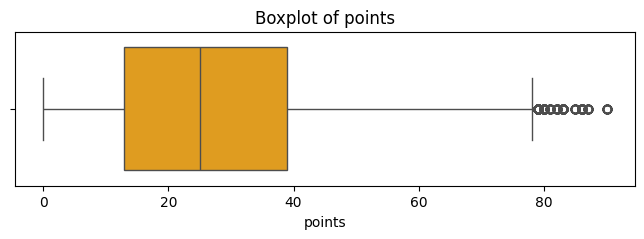

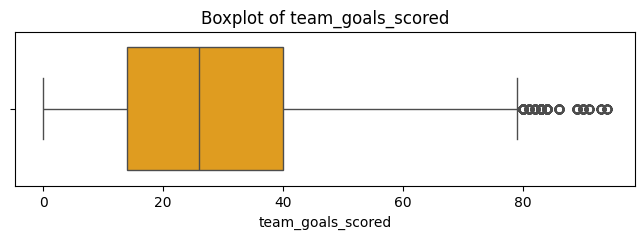

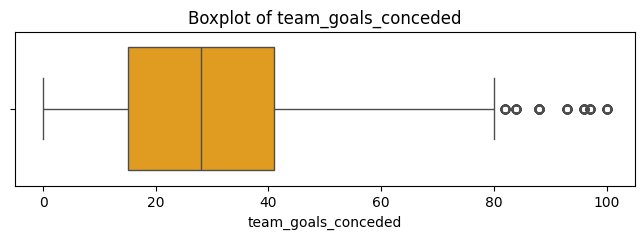

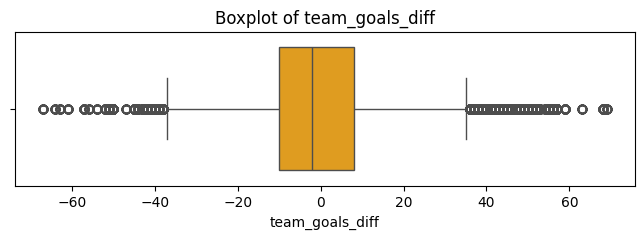

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target = 'total_points'

drop_cols = [
    'season_x', 'name', 'team_x', 'opp_team_name', 'kickoff_time',
    'points', 'team_goals_scored', 'team_goals_conceded', 'team_goals_diff', target
]

df_sample = df.sample(frac=0.15, random_state=42)

X = df_sample.drop(columns=drop_cols)
y = df_sample[target]

X = pd.get_dummies(X, columns=['position'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1]}
    },
    'Lasso': {
        'model': Lasso(),
        'params': {'alpha': [0.1, 1]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [50], 'max_depth': [5, 10]}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [50], 'learning_rate': [0.1], 'max_depth': [3]}
    },
    'SVR': {
        'model': SVR(),
        'params': {'kernel': ['rbf'],
                   'C': [1],
                   'gamma': ['scale']}
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

results = []

for name, mp in models.items():
    print(f"Running GridSearchCV for {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'R2 Score': r2,
        'MSE': mse
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='R2 Score', ascending=False)

Running GridSearchCV for LinearRegression...
Running GridSearchCV for Ridge...
Running GridSearchCV for Lasso...
Running GridSearchCV for RandomForest...
Running GridSearchCV for GradientBoosting...
Running GridSearchCV for SVR...


,Model,Best Params,R2 Score,MSE
3,RandomForest,"{'max_depth': 10, 'n_estimators': 50}",0.979225,0.117175
4,GradientBoosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.969364,0.172793
1,Ridge,{'alpha': 0.1},0.950752,0.277774
0,LinearRegression,{},0.950740,0.277839
2,Lasso,{'alpha': 0.1},0.930526,0.391854
5,SVR,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.929198,0.399341


In [ ]:
best_row = results_df.loc[results_df['R2 Score'].idxmax()]
print("Best Model:", best_row['Model'])
print("Best Params:", best_row['Best Params'])
print("R2 Score:", best_row['R2 Score'])

final_model = models[best_row['Model']]['model'].set_params(**best_row['Best Params'])
final_model.fit(X_train, y_train)

import joblib
joblib.dump(final_model, 'best_fpl_model.pkl')

Best Model: RandomForest
Best Params: {'max_depth': 10, 'n_estimators': 50}
R2 Score: 0.9792252137824522


['best_fpl_model.pkl']